**[Back to Fan's Intro Stat Table of Content](https://fanwangecon.github.io/Stat4Econ/)**

# Basic Graphs and Tables

## Load Packages and Data

### Packages

We will continue to rely on various [tidyverse](https://www.tidyverse.org/). Now including: [ggplot](https://ggplot2.tidyverse.org/reference/ggplot.html), [readr](https://readr.tidyverse.org/), along with [dplyr](https://dplyr.tidyverse.org/) and [tibble](https://tibble.tidyverse.org/), which we used for the [in-class survey](https://fanwangecon.github.io/Stat4Econ/survey/classsurvey.html) already.

In [53]:
# For Data Structures
library(tibble)
# For Data Manipulations
library(dplyr)
# For Reading/Loading Data
library(readr)
# For plotting
library(ggplot2)

### Load File
Let's load in the dataset we created from the [in-class survey](https://fanwangecon.github.io/Stat4Econ/survey/classsurvey.html).

In [54]:
# Load the dataset using readr's read_csv
df_survey <- read_csv('../data/classsurvey.csv')

Parsed with column specification:
cols(
  ID = col_double(),
  ROW = col_double(),
  COL = col_double(),
  gender = col_character(),
  years.in.houston = col_double(),
  major = col_character(),
  commute = col_character(),
  games.attended = col_double(),
  games.any = col_character(),
  econ = col_character()
)


In [55]:
# We have several factor variables, we can set them as factor one by one
df_survey[['gender']] <- as.factor(df_survey[['gender']])
# But that is a little cumbersome, we can using lapply, a core function in r to do this for all factors
factor_col_names <- c('gender', 'major', 'commute', 'games.any', 'econ')
df_survey[factor_col_names] <- lapply(df_survey[factor_col_names], as.factor)
# Check Variable Types
str(df_survey)

Classes 'tbl_df', 'tbl' and 'data.frame':	10 obs. of  10 variables:
 $ ID              : num  1 2 3 4 5 6 7 8 9 10
 $ ROW             : num  3 4 4 4 2 1 2 3 3 4
 $ COL             : num  1 2 10 1 6 7 6 6 3 13
 $ gender          : Factor w/ 2 levels "FEMALE","MALE": 2 1 2 2 1 2 2 2 1 1
 $ years.in.houston: num  21 21 22 22 20 3 25 20 5 20
 $ major           : Factor w/ 5 levels "CONSUMERSCIENCE",..: 2 3 2 2 2 5 2 1 4 2
 $ commute         : Factor w/ 1 level "YES": 1 1 1 1 1 1 1 1 1 1
 $ games.attended  : num  0 2 0 14 0 0 25 2 0 0
 $ games.any       : Factor w/ 2 levels "Has.Attended",..: 2 1 2 1 2 2 1 1 2 2
 $ econ            : Factor w/ 2 levels "ECON","Not.Econ": 1 2 1 1 1 2 1 2 2 1
 - attr(*, "spec")=
  .. cols(
  ..   ID = col_double(),
  ..   ROW = col_double(),
  ..   COL = col_double(),
  ..   gender = col_character(),
  ..   years.in.houston = col_double(),
  ..   major = col_character(),
  ..   commute = col_character(),
  ..   games.attended = col_double(),
  ..   games.any =

# Single Variable

From a dataset, such as the in-class survey, there are various columns, each representing a different variable. We can zoom-in on each of the variables, and focus on that only. 

## Categorical/Discrete
 
Categorical variables, such as Major, Gender, Recent arrival or not, etc, we can generate frequency tables. 

The frequency table simply shows in separate columns (or rows) the name for all the categories for that categorical variable, and show next to these categories that number of times that category appears in the dataset. This is called a frequency table. So if we show a one-way frequency for majors, there would be four rows for the four unique majors from our survey of 10 students, and we would write down the number of students in each of the majors out of the 10 students. 

Rather than showing frequencies, we can also show ratios or percentages by dividing the number of observations in each category by the total number of observations in the survey.

Graphically, we can show the results from these one-way frequency tables using bar charts and pie charts. The bar charts would have separate bars for each category, and the heights of the bars would show the number of observations in that category, or the fraction of individuals in the categorical. The relative heights of bars are the same whether we show the frequencies or the fractions/ratios. A pie chart might give a more direct visual sense of the fraction of observations in each category. 

## Continuous/Quantitative

Graphically, we can show a continuous variable using a histogram. This could be test scores, temperatures, years in houston, etc. This involves first creating a categorical/discrete variable based on the continuous variable. Since the underlying continuous variable is ordered (low to high temperature unless major which is not ordered), the categorica/discrete variable we generate is an ordered categorical variable (majors could be called unordered categorical variable). 

To genereate the histogram, we:
1. Make sure that all observations belongs to one category
    + no observations belonging to no categories
    + each observation only belongs to one category
2. Each category is equi-distance along the continuous variable's original scale. 
3. Then we create a bar graph where each bar is a category, and the height of the bar represents the number of observations within that category. 

# Two Variables Together

## Two Continuous Variables

With two continuous/quantitative variables, we can generate a scatter plot. Crucially, each point of the scatter plot represents one individual, the location of that point indicates the x and y values of that individual. The x and y values could be the individual's test score and hours studied for example. 

## Two Categorical Variables
With two discrete/categorical variables, we can generate two-way frequency tables. This is very similar to what we did for one discrete variable, except now we have columns and rows, representing the categories of the two variables. The two variables could be gender and majors, we would write in each table cell the number of students who are male and econ majors, male and bio majors in for example the first column, and repeat this for girls in the second column. 

## Continuous and Categorical Variable

### Average Across Groups
We can look at the average game attendance by female and male students in our sample, using a bar plot, where the height of the bars now represent the average of the *games.attended* variable for each group.

In [56]:
# We can first find the group averages
df_gender_avg_games <- df_survey %>%
                        group_by(gender) %>%
                        summarise (avg.games.attended = mean(games.attended)) 
df_gender_avg_games

gender,avg.games.attended
FEMALE,0.500000
MALE,6.833333


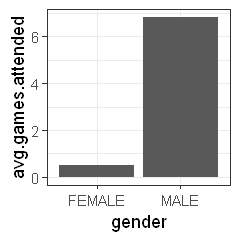

In [57]:
# We can graph based on df_gender_avg_games
# Sizing the Figure Here
options(repr.plot.width = 2, repr.plot.height = 2)
# Plot, stat = identity means to plot the value in avg.games.attended for each gender
ggplot(df_gender_avg_games) + 
    geom_bar(aes(x=gender, y=avg.games.attended), stat = 'identity') + 
    theme_bw()

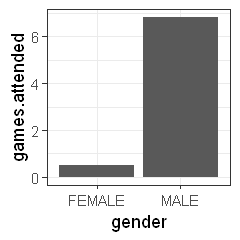

In [58]:
# But it is a little cumbersome to do this in two steps, we can do it in one step
# Sizing the Figure Here
options(repr.plot.width = 2, repr.plot.height = 2)
# Plot directly from df_survey, summary over x for y
# The result looks the same
ggplot(df_survey) + 
    geom_bar(aes(x=gender, y=games.attended), stat = "summary", fun.y = "mean") + 
    theme_bw()

### Average Across Two Groups: Gender and Majors
What is the average game attendance for male and female, econ and non-econ majors? We have 2 female eocn majors, 2 female non-econ majors, 4 male econ majors and 2 male non-econ majors, and their average game attendance are: 0, 1, 9.75 and 1 games. 

In [59]:
# We can calculate the statistics as a table, and also show obs in each group
df_survey %>%
    group_by(gender, econ ) %>%
    summarise (avg.games.attended = mean(games.attended), N.count = n()) 

gender,econ,avg.games.attended,N.count
FEMALE,ECON,0.00,2
FEMALE,Not.Econ,1.00,2
MALE,ECON,9.75,4
MALE,Not.Econ,1.00,2


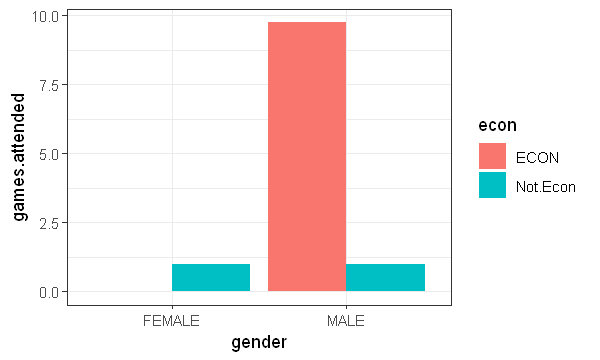

In [60]:
# Let's Show these Visually
options(repr.plot.width = 5, repr.plot.height = 3)
# Plot directly from df_survey
# Using fill for econ, this means econ or not will fill up with different colors
# Still caculate average
# Postion "dodge" means that econ and non-econ wil be shown next to each other
# By default position is to stack different fill groups on top of each other.
ggplot(df_survey) + 
    geom_bar(aes(x=gender, y=games.attended, fill=econ),
             stat = "summary", fun.y = "mean", position = "dodge") + 
    theme_bw()